## Analyzing Model Performance Assignment
In this assignment you will load a dataset and train a Logistic regression Classifier use the techniques discussed in the lesson to measure the performance. We will use the [Statlog Shuttle](http://archive.ics.uci.edu/ml/datasets/Statlog+%28Shuttle%29) dataset from UCI  to train a classifier to predict a full house.

### The Dataset
Each record contain 9 numerical attributes. There are two classes to predict, we will call them **positive** and **negative**.



### 1. Import necessary packages

For this exercise we need

 - pandas
 - train_test_split
 - LogisticRegression
 - pyplot from matplotlib
 - KNeighborsClassifier
 - LogisticRegressionClassifier
 - RandomForestClassifier
 - DummyClassifier

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

### 2. Load and prepare the dataset


1.   Load the training data into a dataframe named **df_train_data** (this step is done for you).
2.   Create binary classification problem - rename some class labels (this step done for you).
3.   Create a dataframe of 9 features named **X**.
4.   Create a data frame of labels named **y**.
5.   Split the data into a training set and a test set.




In [0]:
df_train_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/shuttle/shuttle.tst', header=None, sep=' ')

df_train_data.loc[df_train_data[9] != 4, 9] = 0
df_train_data.loc[df_train_data[9] == 4, 9] = 1

X = df_train_data.drop([9], axis=1)

y = df_train_data[9]
X_train, X_test, y_train, y_test = train_test_split(X, y)

print('There are {:d} training samples and {:d} test samples'.format(X_train.shape[0], X_test.shape[0]))


There are 10875 training samples and 3625 test samples


### 3. Create the model


1.   Instantiate a Logistic Regression classifier with a `lbfgs` solver.
2.   Fit the classifier to the data.

In [0]:
lr = LogisticRegression(solver='lbfgs', penalty='none', max_iter=1000)
lr.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 4. Calculate Accuracy
Calculate and print the accuracy of the model on the test data.

In [0]:
lr_score = lr.score(X_test, y_test)

print('Accuracy of Logistic Regression: {:.3f}'.format(lr_score))

Accuracy of Logistic Regression: 0.818


### 5. Dummy Classifier
Use the dummy classifier to calculate the accuracy of a purely random chance.

*Compare this result to the result of the logistic regression classifier above. What does this result tell you?*

In [0]:
dummy = DummyClassifier(strategy = 'uniform')
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

0.8468965517241379

### 6. Confusion Matrix
Print the confusion matrix.


In [0]:
predictions = lr.predict(X_test)

confusion = confusion_matrix(y_test, predictions)
print(confusion)

[[2940  130]
 [ 530   25]]


In [0]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

### 7. Plot a nicer confusion matrix (optional)
Use the *plot_confusion_matrix* function from above to plot a nicer looking confusion matrix.

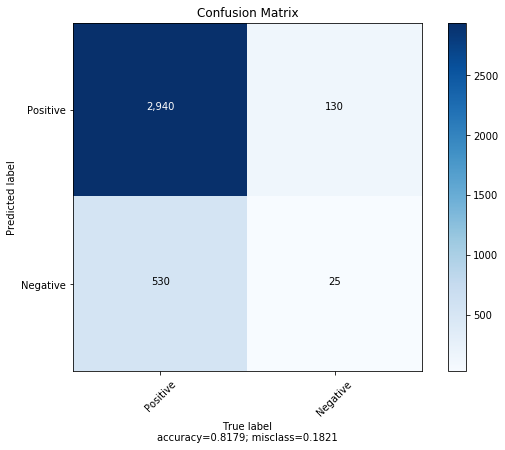

In [0]:
plot_confusion_matrix(cm=confusion, target_names = ['Positive', 'Negative'], title = 'Confusion Matrix',normalize=False)


### 8. Calculate Metrics
Print the F1, F beta, precision, recall and accuracy scores.

In [0]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
fbeta_precision = fbeta_score(y_test, predictions, 0.5)
fbeta_recall = fbeta_score(y_test, predictions, 2)

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))

Accuracy score: 0.82
Precision score: 0.16
Recall score: 0.05
F1 score: 0.07
Fbeta score favoring precision: 0.11
FBeta score favoring recall: 0.05


### 9. Print a classification report

In [0]:
report = classification_report(y_test, predictions, target_names=['Negative', 'Positive'])
print(report)

              precision    recall  f1-score   support

    Negative       0.85      0.96      0.90      3096
    Positive       0.14      0.04      0.06       529

    accuracy                           0.82      3625
   macro avg       0.49      0.50      0.48      3625
weighted avg       0.75      0.82      0.78      3625



### 10. Plot ROC Curve and AUC
 Caculate AUC and plot the curve.


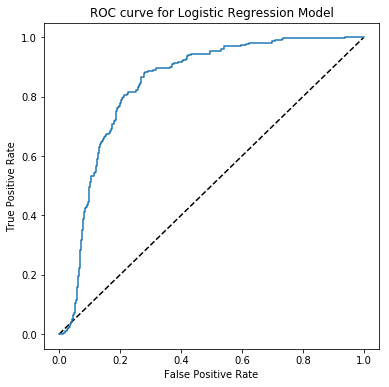

Area under the ROC curve: 0.843


In [0]:
probs = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
fig = plt.figure(figsize = (6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Regression Model')
plt.show()

auc = roc_auc_score(y_test, probs)
print('Area under the ROC curve: {:.3f}'.format(auc))

### 11. Plot Precision-Recall Curve
Plot the precision-recall curve for the model above.

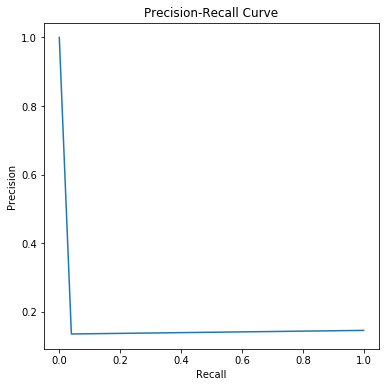

In [0]:
pres, rec, thresholds = precision_recall_curve(y_test, predictions)
fig = plt.figure(figsize = (6, 6))
plt.plot(rec, pres)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

Find the best value for C in the Logistic Regression Classifier for avoiding overfitting. Plot the training and testing accuracy over a range of C values from 0.05 to 1.5.

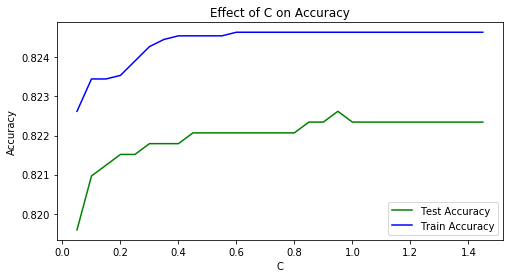

In [0]:
c_vals = np.arange(0.05, 1.5, 0.05)
test_accuracy = []
train_accuracy = []

for c in c_vals:
  lr = LogisticRegression(solver='lbfgs', penalty='l2', C=c, max_iter=1000)
  lr.fit(X_train, y_train)
  test_accuracy.append(lr.score(X_test, y_test))
  train_accuracy.append(lr.score(X_train, y_train))

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(c_vals, test_accuracy, '-g', label='Test Accuracy')
ax1.plot(c_vals, train_accuracy, '-b', label='Train Accuracy')
ax1.set(xlabel='C', ylabel='Accuracy')
ax1.set_title('Effect of C on Accuracy')
ax1.legend()
plt.show()

### 12. Cross Validation
Perform 5-fold cross validation for a Logistic Regression Classifier. Print the 5 accuracy scores and the mean validation score.

In [0]:
clf = LogisticRegression(solver='lbfgs', max_iter=1000)
cv_scores = cross_val_score(clf, X_train, y_train, cv = 5)

print('Accuracy scores for the 5 folds: ', cv_scores)
print('Mean cross validation score: {:.3f}'.format(np.mean(cv_scores)))

Accuracy scores for the 5 folds:  [0.81893382 0.8262069  0.82942529 0.81885057 0.82704692]
Mean cross validatiion score: 0.824


### 13. Is this really linear?
Our linear classifier is not giving us accuracy better than the dummy classifier. Suppose that the data was not linearly separable? Instantiate and train a KNN model with k = 7. How does the accuracy of the KNN model compare to the Logistic Regression from above? What does that tell you about the data?

In [0]:
knn = KNeighborsClassifier(n_neighbors=7)

# Then  fit the model
knn.fit(X_train, y_train)

# How well did we do
knn_7_score = knn.score(X_test, y_test)

print('Accuracy of KNN (k = 7): {:.3f}'.format(knn_7_score))


Accuracy of KNN (k = 7): 0.998


### 14. Random Forest
Next, instantiate and fit a RandomForestClassifier and calculate the accuracy of that model.

In [0]:
rf = RandomForestClassifier(n_estimators = 22, random_state = 40)

rf.fit(X_train,y_train)

rf_score = rf.score(X_test, y_test)

print('Accuracy of Random Forest: {:.3f}'.format(rf_score))

Accuracy of Random Forest: 1.000
